In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,f1_score,recall_score

In [2]:
import warnings

warnings.filterwarnings("ignore")


# READING THE CSV FILE

In [3]:
df=pd.read_csv(r'data (1).csv')

In [4]:
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


# CHECKING FOR NULL VALUES

In [5]:
print(df.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [6]:
df.info

<bound method DataFrame.info of      footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1     0
2          31         7   2    2   6    1  24   6            1     0
3          83         4   3    4   5    1  28   6            1     0
4         640         7   5    6   4    0  68   6            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]>

In [7]:
df.shape

(944, 10)

# VISUALIZING THE DISTRIBUTION OF EACH FEATURE

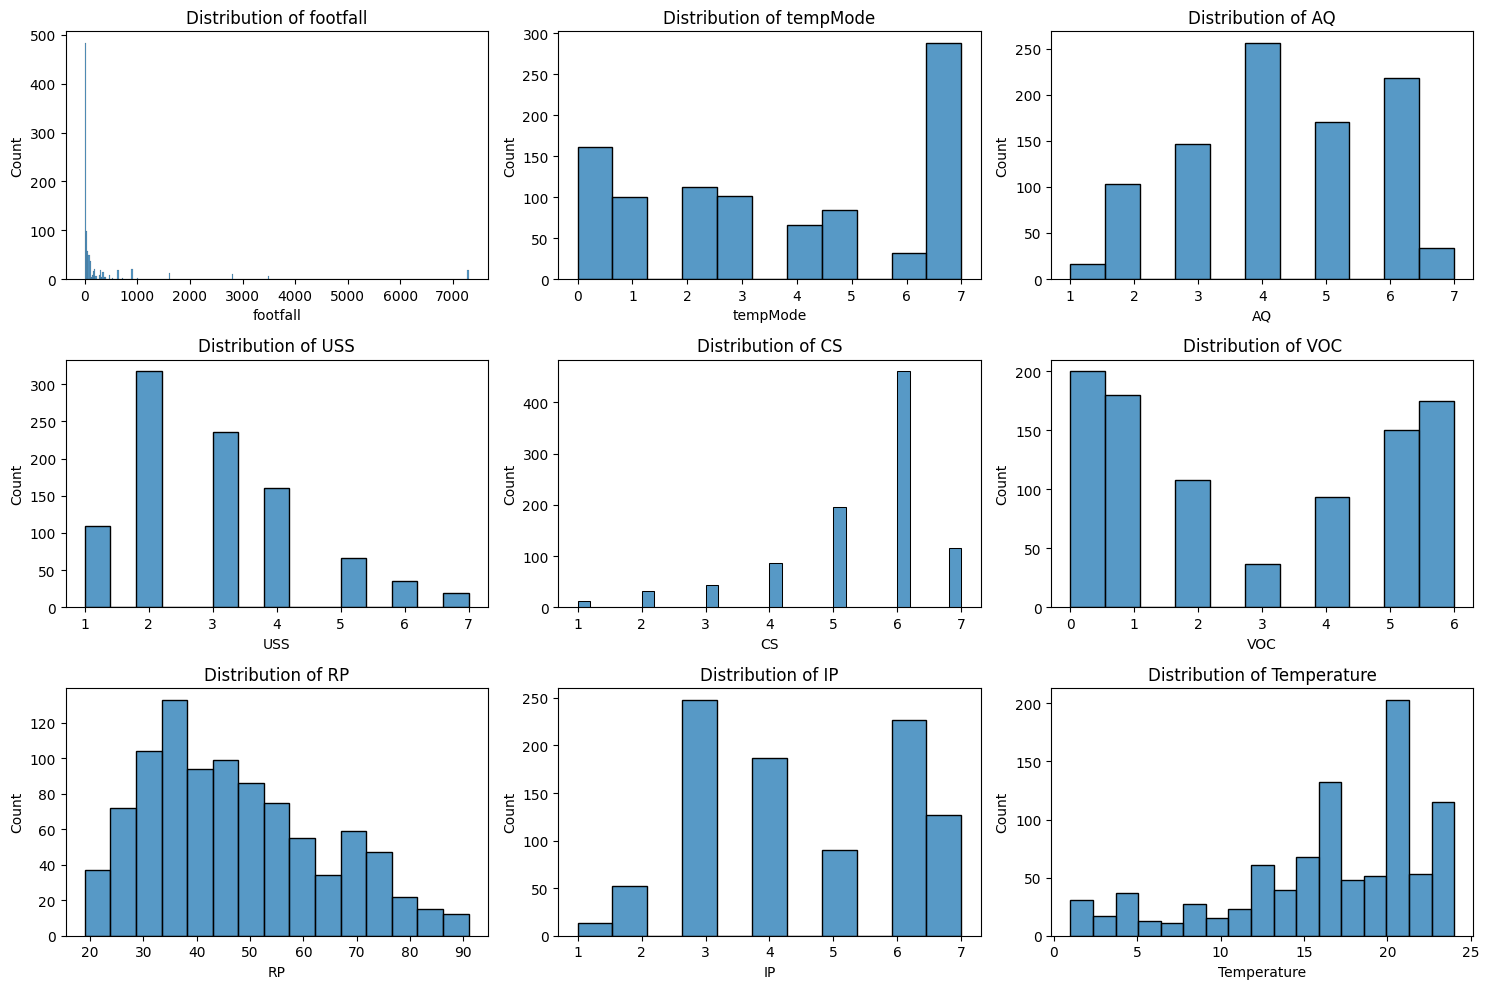

In [8]:
continuous_features = ['footfall','tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[feature]) 
    plt.title(f'Distribution of {feature}')

plt.tight_layout() 
plt.show()


# CORRELATION HEATMAP

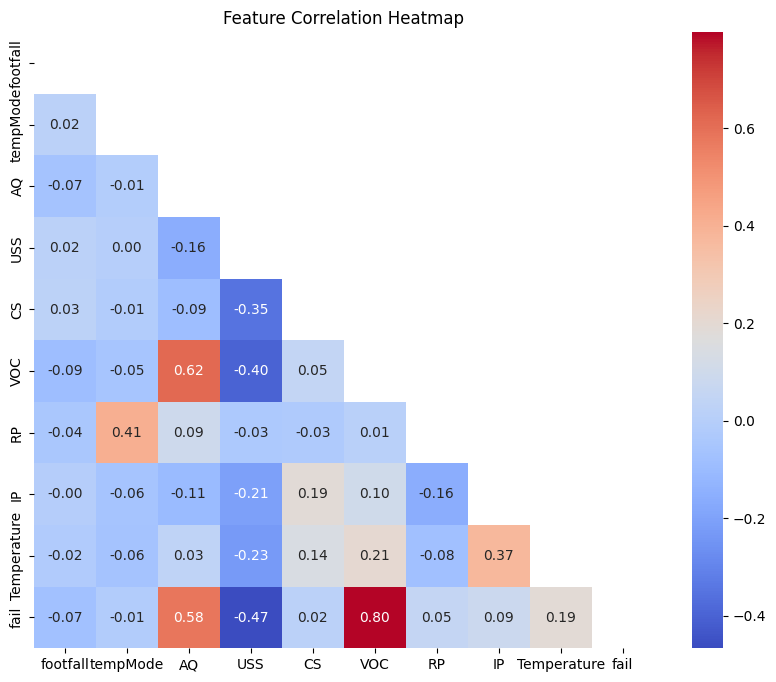

In [9]:
import numpy as np

correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation))
plt.title('Feature Correlation Heatmap')
plt.show()


# TRAIN-TEST SPLIT

In [10]:
fea = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']
x=df[fea]
y=df.fail


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [48]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [49]:
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(660, 9)

(284, 9)

(660,)

(284,)

In [50]:
from sklearn.linear_model import LogisticRegression
model_logr=LogisticRegression()
model_logr.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred=model_logr.predict(x_test)

In [52]:
print(accuracy_score(y_pred,y_test))

0.926056338028169


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       175
           1       0.92      0.88      0.90       109

    accuracy                           0.93       284
   macro avg       0.93      0.92      0.92       284
weighted avg       0.93      0.93      0.93       284



In [59]:
confusion_matrix(y_test,y_pred)

array([[167,   8],
       [ 13,  96]], dtype=int64)

In [62]:
print('accuracy :',accuracy_score(y_pred,y_test))
print('precision :',precision_score(y_pred,y_test))
print('recall :',recall_score(y_pred,y_test))
print('f1 score:',f1_score(y_pred,y_test))

accuracy : 0.926056338028169
precision : 0.8807339449541285
recall : 0.9230769230769231
f1 score: 0.9014084507042254


# SAVING THE TRAINED MODEL

In [64]:
import joblib
joblib.dump(model_logr, 'logistic_model.pkl')


['logistic_model.pkl']